In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt


for dirname, _, filenames in os.walk('kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle\input\sample_submission.csv
kaggle\input\train.csv
kaggle\input\test\1000213997.csv
kaggle\input\test\100023368.csv
kaggle\input\test\1000488999.csv
kaggle\input\test\1001028887.csv
kaggle\input\test\1001857862.csv
kaggle\input\test\1003310246.csv
kaggle\input\test\1003545497.csv
kaggle\input\test\1004288653.csv
kaggle\input\test\10044968.csv
kaggle\input\test\1005166812.csv
kaggle\input\test\1005502784.csv
kaggle\input\test\1005767712.csv
kaggle\input\test\1005985933.csv
kaggle\input\test\1006013726.csv
kaggle\input\test\1006026494.csv
kaggle\input\test\1006540019.csv
kaggle\input\test\1007067208.csv
kaggle\input\test\1007233480.csv
kaggle\input\test\100741545.csv
kaggle\input\test\100781580.csv
kaggle\input\test\1008031106.csv
kaggle\input\test\1008453141.csv
kaggle\input\test\1008467020.csv
kaggle\input\test\1008990702.csv
kaggle\input\test\100924436.csv
kaggle\input\test\1009570124.csv
kaggle\input\test\1010782837.csv
kaggle\input\test\101092507.csv
kaggle\input\test\1010943

In [5]:
    
def tiempo_de_csv(carpeta):
    count = {}
    archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]
    samples_csv = archivos_csv[:10]
    for csv in samples_csv:
        ruta_archivo = os.path.join(carpeta, csv)
        with open(ruta_archivo, 'r') as f:
            conteo_filas = sum(1 for linea in f)
        count[csv] = conteo_filas

    return count

carpeta_csv = 'kaggle/input/train'
count = tiempo_de_csv(carpeta_csv)

for csv, num in count.items():
    print(f"csv: {csv}, Filas: {num}")

csv: 1000015382.csv, Filas: 60002
csv: 1000554676.csv, Filas: 60002
csv: 1000745424.csv, Filas: 60002
csv: 1001461087.csv, Filas: 60002
csv: 1001732002.csv, Filas: 60002
csv: 1002275321.csv, Filas: 60002
csv: 1002575641.csv, Filas: 60002
csv: 1002609771.csv, Filas: 60002
csv: 1002624617.csv, Filas: 60002
csv: 1002789083.csv, Filas: 60002


In [6]:
csv_train = os.listdir('kaggle/input/train')
num_csv_train = len(csv_train)
print("Numero de csv a entrenar:", num_csv_train)

csv_test = os.listdir('kaggle/input/test')
num_csv_test = len(csv_test)
print("Numero de csv para test:", num_csv_test)

train_csv  = pd.read_csv('kaggle/input/train.csv')
display(train_csv)

sample_submission  = pd.read_csv('kaggle/input/sample_submission.csv')
display(sample_submission)

Numero de csv a entrenar: 4431
Numero de csv para test: 4520


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0
...,...,...
4515,996704281,0
4516,997630809,0
4517,998072137,0
4518,998136924,0


In [7]:
csv_train[0]

'1000015382.csv'

In [8]:
sensores_primer_csv = pd.read_csv('kaggle/input/train/'+csv_train[0])
display(sensores_primer_csv)
display(sensores_primer_csv.describe())


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,260.0,64.0,-232.0,-36.0,-2.0,-35.0,103.0,389.0,67.0,41.0
1,233.0,175.0,146.0,160.0,-4.0,29.0,-120.0,498.0,59.0,63.0
2,216.0,236.0,321.0,202.0,2.0,113.0,-230.0,554.0,97.0,90.0
3,156.0,205.0,382.0,6.0,12.0,70.0,-228.0,580.0,141.0,122.0
4,158.0,101.0,272.0,-154.0,16.0,45.0,-162.0,624.0,145.0,154.0
...,...,...,...,...,...,...,...,...,...,...
59996,245.0,75.0,-306.0,307.0,-49.0,118.0,361.0,824.0,-25.0,371.0
59997,248.0,29.0,-398.0,145.0,-29.0,196.0,308.0,892.0,-38.0,408.0
59998,146.0,-100.0,-525.0,10.0,-5.0,344.0,217.0,837.0,-137.0,509.0
59999,86.0,-275.0,-619.0,-72.0,16.0,354.0,171.0,602.0,7.0,648.0


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
count,60001.000000,59847.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000
mean,0.382244,2.266563,2.192213,-0.148031,-0.263129,1.630089,-0.615190,-0.177964,-0.402777,0.896752
std,111.553322,451.741111,373.923764,231.812464,129.504432,222.294642,269.678045,319.999406,176.087814,249.024286
min,-920.000000,-7871.000000,-2444.000000,-1815.000000,-2484.000000,-1128.000000,-1453.000000,-2947.000000,-1585.000000,-2961.000000
25%,-66.000000,-163.000000,-223.000000,-150.000000,-30.000000,-147.000000,-172.000000,-194.000000,-106.000000,-117.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,168.000000,224.000000,149.000000,30.000000,149.000000,174.000000,195.000000,106.000000,119.000000
max,822.000000,7321.000000,2563.000000,1491.000000,2608.000000,1119.000000,1668.000000,3676.000000,1162.000000,3179.000000


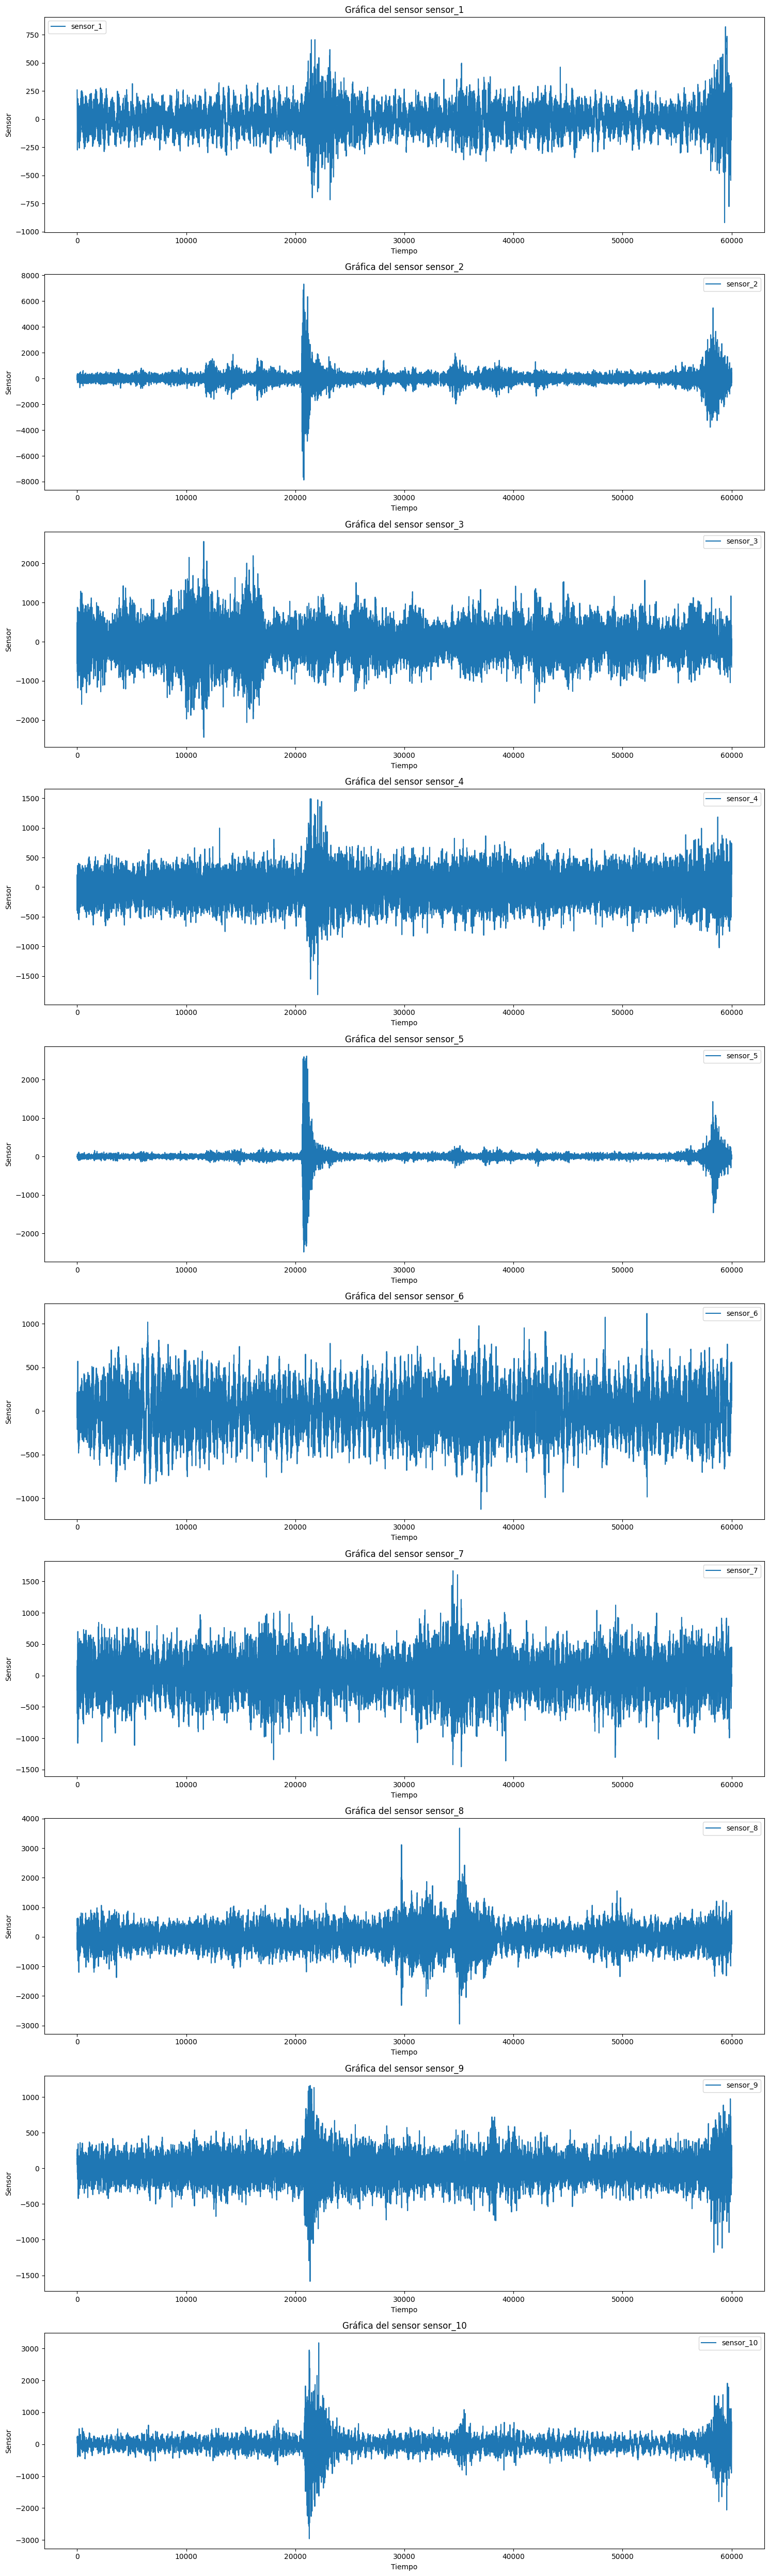

In [9]:
sensores_primer_csv = pd.read_csv('kaggle/input/train/'+csv_train[0])
num_filas = sensores_primer_csv.shape[0]
sensores = sensores_primer_csv.columns.tolist()
plt.figure(figsize=(15, 5 * len(sensores)))


for i, sensor in enumerate(sensores):
    plt.subplot(len(sensores), 1, i+1)
    plt.plot(range(num_filas), sensores_primer_csv[sensor], label=sensor)
    plt.xlabel('Tiempo')
    plt.ylabel('Sensor')
    plt.title(f'Gráfica del sensor {sensor}')
    plt.legend()

plt.tight_layout()
plt.show()